In [1]:
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
flights = pd.read_csv('Datasets/flights.csv', low_memory=False)

In [3]:
pd.set_option('display.max_columns', 50)

flights.head(10)

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   
5  2015      1    1            4      DL            806      N3730B   
6  2015      1    1            4      NK            612      N635NK   
7  2015      1    1            4      US           2013      N584UW   
8  2015      1    1            4      AA           1112      N3LAAA   
9  2015      1    1            4      DL           1173      N826DN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            ANC                 SEA                    5          2354.0   
1            LAX                 PBI                   10             2.0   
2            SFO                 CLT                   20            18.0   
3            LAX                 MIA                   20            15.0   
4            SEA                 ANC                   25            24.0   
5            SFO                 MSP                   25            20.0   
6            LAS                 MSP                   25            19.0   
7            LAX                 CLT                   30            44.0   
8            SFO                 DFW                   30            19.0   
9            LAS                 ATL                   30            33.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0            -11.0      21.0        15.0           205.0         194.0   
1             -8.0      12.0        14.0           280.0         279.0   
2             -2.0      16.0        34.0           286.0         293.0   
3             -5.0      15.0        30.0           285.0         281.0   
4             -1.0      11.0        35.0           235.0         215.0   
5             -5.0      18.0        38.0           217.0         230.0   
6             -6.0      11.0        30.0           181.0         170.0   
7             14.0      13.0        57.0           273.0         249.0   
8            -11.0      17.0        36.0           195.0         193.0   
9              3.0      12.0        45.0           221.0         203.0   

   AIR_TIME  DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0     169.0      1448      404.0      4.0                430         408.0   
1     263.0      2330      737.0      4.0                750         741.0   
2     266.0      2296      800.0     11.0                806         811.0   
3     258.0      2342      748.0      8.0                805         756.0   
4     199.0      1448      254.0      5.0                320         259.0   
5     206.0      1589      604.0      6.0                602         610.0   
6     154.0      1299      504.0      5.0                526         509.0   
7     228.0      2125      745.0      8.0                803         753.0   
8     173.0      1464      529.0      3.0                545         532.0   
9     186.0      1747      651.0      5.0                711         656.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                 NaN               NaN   
1           -9.0         0          0                 NaN               NaN   
2            5.0         0          0                 NaN               NaN   
3           -9.0         0          0                 NaN               NaN   
4          -21.0         0          0                 NaN               NaN   
5            8.0         0          0                 NaN               NaN   
6          -17.0         0          0                 NaN               NaN   
7          -10.0         0          0                 NaN          

In [4]:
flights = flights.sample(frac=0.1, random_state=27)

In [5]:
flights.shape

(581908, 31)

In [6]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [19]:
flights.profile_report()

Report

Target: ARRIVAL_DELAY

IMPORTANT: MONTH, DAY, DAY_OF_WEEK, AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT, SCHEDULED_DEPARTURE, DEPARTURE_TIME, 

ROW DROP:
CANCELLED (We're looking for delays, not full on cancelations)

COLUMN DROP:
ARRIVAL_TIME (Leakage)
WHEELS_ON (Leakage)
AIRLINE_DELAY (Post-Mortem)
AIR_SYSTEM_DELAY (Post-Mortem)
AIR_TIME (Leakage, direct correlation)
CANCELLATION_REASON (related to CANCELLED)
DEPARTURE_DELAY (Leakage, direct correlation)
DIVERTED (Post-Mortem)
ELAPSED_TIME (Leakage, direct correlation)
FLIGHT_NUMBER (no logical correlation, high cardinality)
LATE_AIRCRAFT_DELAY (Post-Mortem)
SECURITY_DELAY (Direct correlation, cannot be predicted)
TAIL_NUMBER (no logical correlation, high cardinality)
WEATHER_DELAY (Post-Mortem)
WHEELS_OFF (very similar to SCHEDULED_DEPARTURE)
WHEELS_ON (very similar to ARRIVAL_TIME)
YEAR (is constantly 2015)

In [7]:
def wrangle(df):
    flights = df[df.CANCELLED == 1]
    
    todrop = ['ARRIVAL_TIME', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'AIR_TIME',
               'CANCELLATION_REASON', 'DEPARTURE_DELAY', 'DIVERTED', 'ELAPSED_TIME',
               'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'SECURITY_DELAY', 'TAIL_NUMBER',
               'WEATHER_DELAY', 'WHEELS_OFF', 'YEAR', 'CANCELLED', 'WHEELS_ON']    
    
    flights = df.drop(columns=todrop, inplace=True)
    
    return df

In [8]:
wrangle(flights)

MONTH  DAY  DAY_OF_WEEK AIRLINE ORIGIN_AIRPORT DESTINATION_AIRPORT  \
2677325      6   18            4      DL            ATL                 MSY   
1983991      5    6            3      B6            JFK                 AUS   
2975206      7    6            1      EV            ABE                 ATL   
5670364     12   22            2      AA            PHX                 OGG   
1986449      5    7            4      WN            BWI                 HOU   
4109444      9   13            7      AA            DCA                 LGA   
3208323      7   20            1      HA            OGG                 HNL   
1122046      3   14            6      DL            RNO                 SLC   
1364519      3   29            7      B6            LGA                 PBI   
2334783      5   28            4      OO            LNK                 DEN   
103129       1    7            3      EV            BTR                 IAH   
1260153      3   23            1      WN            LGA                 BNA   
3786679      8   23            7      WN            MDW                 DTW   
3690899      8   17            1      B6            BOS                 PIT   
4972534     11    7            6      DL            SLC                 SAN   
2728729      6   21            7      WN            SAN                 BWI   
3126670      7   15            3      B6            DCA                 FLL   
2212337      5   21            4      UA            DCA                 IAH   
4947184     11    5            4      MQ            DFW                 MAF   
2673418      6   18            4      AA            DFW                 SNA   
5308831     11   29            7      B6            BDL                 FLL   
1032743      3    9            1      WN            ATL                 DAL   
1044982      3   10            2      US            PIT                 CLT   
4358404      9   29            2      DL            ATL                 SNA   
5098375     11   15            7      B6            EWR                 BOS   
4161999      9   16            3      EV            ATL                 IAH   
3784985      8   23            7      DL            JFK                 ATL   
5069357     11   13            5      WN            PHX                 STL   
2719340      6   20            6      AS            SEA                 SAN   
999845       3    7            6      WN            PHX                 MKE   
...        ...  ...          ...     ...            ...                 ...   
3611613      8   12            3      DL            SFO                 ATL   
5118749     11   16            1      DL            ATL                 BNA   
969465       3    5            4      AA            DFW                 FAT   
3079086      7   12            7      DL            MEM                 ATL   
671439       2   14            6      AA            STT                 MIA   
663514       2   13            5      WN            DAL                 SAT   
5654340     12   21            1      DL            PNS                 ATL   
2117045      5   15            5      AA            DCA                 DFW   
3951411      9    2            3      DL            MSP                 GEG   
236897       1   16            5      WN            RDU                 MCO   
1791433      4   24            5      AA            HNL                 DFW   
3120810      7   14            2      DL            PDX                 ATL   
2620637      6   15            1      UA            SAN                 DEN   
3956461      9    3            4      WN            DEN                 LAS   
390500       1   26            1      DL            MCI                 ATL   
821007       2   23            1      UA            ITO                 LAX   
683483       2   15            7      OO            ASE                 ORD   
4656498     10   18            7      NK          13930               13487   
5593902     12   17            4      AA            LAX    

In [9]:
ls = list(range(-999, -15))
flights['ARRIVAL_DELAY'].replace(ls, 'EARLY', inplace=True)
    
ls = list(range(-15, 16))
flights['ARRIVAL_DELAY'].replace(ls, 'NONE', inplace=True)
    
ls = list(range(16, 2000))
flights['ARRIVAL_DELAY'].replace(ls, 'LATE', inplace=True)

In [10]:
flights = flights.dropna(subset=['ARRIVAL_DELAY'])

In [11]:
flights = flights[~flights.ORIGIN_AIRPORT.apply(lambda x: x.isnumeric())]
flights = flights[~flights.DESTINATION_AIRPORT.apply(lambda x: x.isnumeric())]

In [12]:
flights.ARRIVAL_DELAY.value_counts(normalize=True)

NONE     0.625920
EARLY    0.190418
LATE     0.183662
Name: ARRIVAL_DELAY, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(flights, test_size=0.2)

In [14]:
train.shape, test.shape

((418368, 14), (104593, 14))

In [15]:
target = 'ARRIVAL_DELAY'

In [16]:
# Split Train and Test into X and Y
X_train = train.drop(columns=target)
y_train = train[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((418368, 13), (418368,), (104593, 13), (104593,))

In [17]:
# Libraries
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [18]:
# Create pipeline using OE, SI, and RFC.
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier()
)

# Set hyper param distributions for RSCV
param_distributions = {
    'randomforestclassifier__min_samples_leaf': randint(1, 2500), 
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestclassifier__n_estimators': randint(25, 100), 
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None], 
    'randomforestclassifier__max_features': uniform(0, 1)
}

# Create RSCV model
search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_distributions, 
    n_iter=10, 
    cv=4, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

# Fit model
search.fit(X_train, y_train);

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  22 out of  40 | elapsed:  3.8min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  27 out of  40 | elapsed:  4.2min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  32 out of  40 | elapsed:  5.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  37 out of  40 | elapsed:  5.7min remaining:   27.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  5.7min finished


In [19]:
# Display best hyper-parameters and best cross-validation score
print('Best hyperparameters', search.best_params_)
print('Cross-validation Score', search.best_score_)

Best hyperparameters {'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 0.9176166440253857, 'randomforestclassifier__min_samples_leaf': 757, 'randomforestclassifier__n_estimators': 54, 'simpleimputer__strategy': 'mean'}
Cross-validation Score 0.6961837425424506


In [29]:
print('Test Accuracy', search.score(X_test, y_test))

Test Accuracy 0.7022936525388889


In [21]:
X_train.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'TAXI_OUT', 'SCHEDULED_TIME', 'DISTANCE', 'TAXI_IN',
       'SCHEDULED_ARRIVAL'],
      dtype='object')

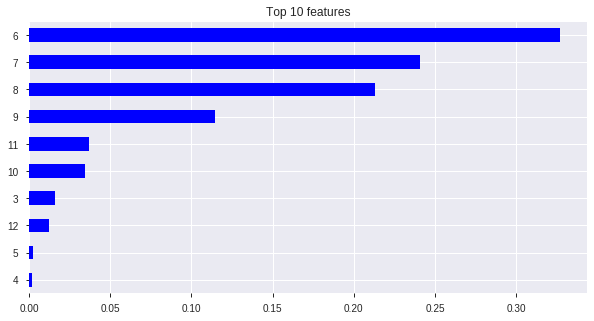

In [23]:
# Get feature importances
importances = pd.Series(search.best_estimator_.steps[2][1].feature_importances_)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


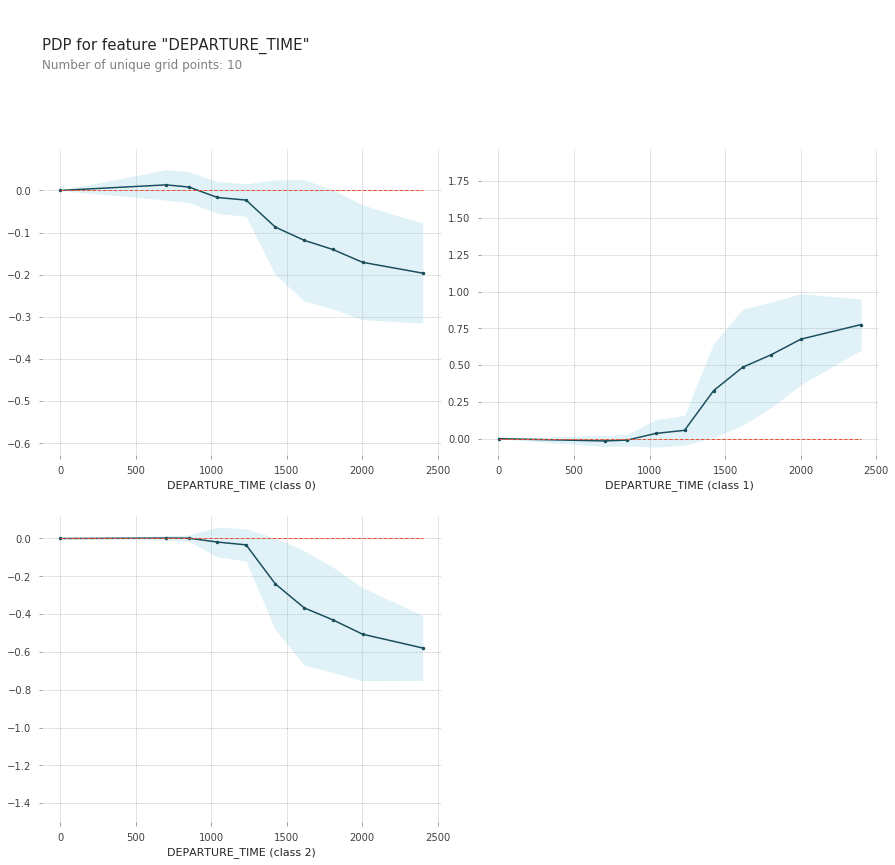

In [24]:
# PDP for DEPARTURE_TIME
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'DEPARTURE_TIME'

isolated = pdp_isolate(
    model=search, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


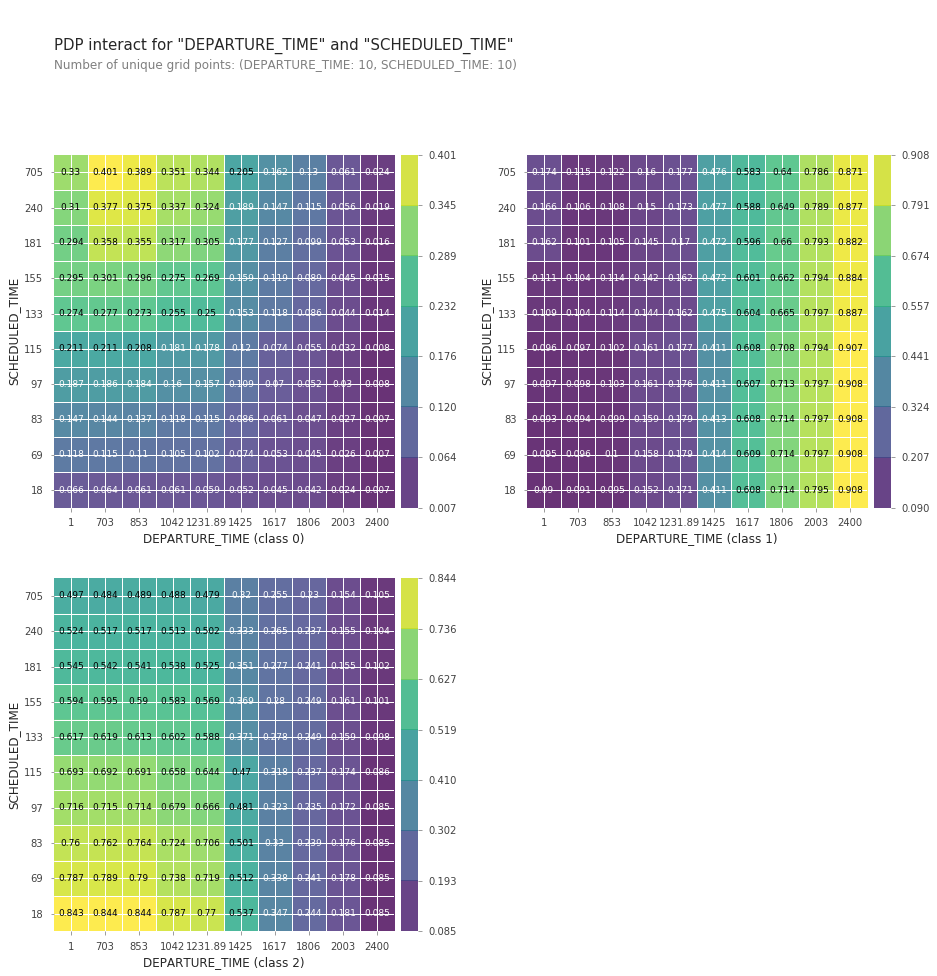

In [26]:
# PDP Interaction for Inspection Date and Zip
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['DEPARTURE_TIME', 'SCHEDULED_TIME']

interaction = pdp_interact(
    model=search, 
    dataset=X_train, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);